# Problem Set 3

**Experimental Uncertainties and Error Propagation**

CHEM 114

Shimon Weiss

Due data: 

---


## Problem 1

Compute the following dimensionless quantity and find the correct error bars (pay attention to the order of operations indicated by the
brackets):

$$[(0.0045 \pm 0.0005) + (0.3 \pm 0.9)] / (1.5 \pm 0.1) = ?$$

- Write out eqation(s) used for error propagation in a markdown cell with $\LaTeX$ (see [cheatsheet](https://wch.github.io/latexsheet/latexsheet.pdf))
- pretty print solution, see `uncertainties` [documentation](https://uncertainties-python-package.readthedocs.io/_/downloads/en/stable/pdf/)
for examples

---


**Solution**

Using the `uncertainties` module, we can easily calculate the quantity and the the error bar.

The error propagation for addition is:

$$\alpha_Z = \sqrt{(\alpha_A)^2 + (\alpha_B)^2}$$

The error propagation for division is:

$$\alpha_Z = \sqrt{(\frac{\alpha_A}{A})^2 + (\frac{\alpha_B}{B})^2}$$



In [1]:
# install and import `uncertainties` module
!pip install uncertainties
from uncertainties import ufloat

     |████████████████████████████████| 256kB 6.8MB/s 


In [2]:
# perform calculation
x = (ufloat(0.0045, 0.0005) + ufloat(0.3, 0.9)) / ufloat(1.5, 0.1)

# pretty print solution using the CORRECT number of significant figures
print(f'x = {x:.1uP}')

x = 0.2±0.6


---

## Problem 2


Report the following numerical distance correctly, with error
bars $$X+Y$$ where $X = 110.125 \pm 0.003$ m and $Y = 85.6 \pm 0.2$ m

---

**Solution** 

Whether we use the $\sigma_Z = \sigma_X + \sigma_Y$ method or the quadrature method, 
the error in $X + Y$ is dominated by the error in $Y$ (i.e. $\sigma_Y \gg \sigma_X$).

Thus the error bar is $0.2$ m 

Next, we round $110.125 + 85.6 = 195.725$ to the tenths digit, 
giving $195.7 \pm 0.2$ m


---
## Problem 3

Express the following result in proper rounded form, with suitable error bars: 

mass $ = 19.1234$ g with uncertainty $0.6789$ g.

---

**Solution** 

First we need to round the error bar to $1$ or $2$ sig figs. 
Let's round to 1 sig fig: $0.7$ g 

Then we round the mass to this figure: $19.1$ g

Giving: $19.1(7)$ g

---
## Problem 4

Your experiment yielded the following measurement:

$(4.1234 \pm 0.4321)$ Joules

Report this number with proper error bars and appropriate signicant figures.

---

**Solution** 

Either 

$(4.1 \pm 0.4)$ J 

or 

$(4.12 \pm 0.43)$ J

---
## Problem 5

How many signicant gures are there in each of the following expressions?
- $0.00082$ s

- $0.14800$ psi

- $6.24 \times 10^6$ l

- $-754.090 \times 10^{-27}$ J

- $50$ cm

- $50$ m

---

**Solution**

- $0.00082$ s: 2 sig figs

- $0.14800$ psi: 5 sig figs

- $6.24 \times 10^6$ l: 3 sig figs

- $-754.090 \times 10^{-27}$ J: 6 sig figs

- $50$ cm: 1 or 2 sig figs

- $50$ m: 1 or 2 sig figs

---

## Problem 6

You measure the length of an object with a ruler with smallest division of 1 mm. 

You measure the length 5 times with results in mm, estimating the last digit: 

$123.4, 123.5, 124.6, 123.7, 123.8$ mm 

- What is the average length and the uncertainty in length?

---


**Solution**

For an "analog" device with the smallest division of 1 mm, 
and we can only estimate to 1/2 of the smallest division i.e. $0.5$ mm.
Giving:

$123.8(5)$ mm

---

## Problem 7

The Richter magnitude of an earthquake is determined
from the logarithm of the amplitude of waves 
recorded by seismographs 
(adjustments are included to compensate for the
variation in the distance between the various seismographs and the epicenter of the earthquake). The formula is defined as:

$$M_L = log_{10}(A / A_0(\delta))$$

where $A$ is the maximum excursion of the 
Wood-Anderson seismograph, the
empirical function $A_0$ depends only on the
epicentral distance of the station, $\delta$. 
Both $A$ and $\delta$ are prone to measurement error. 

Write an expression for the uncertainty in $M_L$ 
due to errors in $A$ and $\delta$
- Write the propagation error formula for $M_L$
- use the [`sympy`](https://docs.sympy.org/latest/index.html) module to solve for the uncertainty.
  - useful examples/tutorial can be found in the 
  [iPython cookbook](https://github.com/ipython-books/cookbook-2nd-code/tree/master/chapter15_symbolic)

---

**Solution**

The propagation of error formula for $M_L$ (written with $\LaTeX$) is:

$$\sigma^2_{M_L} = \left|\frac{\partial{M_L}}{\partial{A}}\right|^2\sigma^2_A + \left|\frac{\partial{M_L}}{\partial{\delta}}\right|^2\sigma^2_{\delta}$$

Using `sympy` we can solve for the partial derivatives $\frac{\partial{M_L}}{\partial{A}}$
and $\frac{\partial{M_L}}{\partial{\delta}}$

Note that the expression for uncertainty in $M_L$ can be, perhaps more easily, 
expressed with `sympy` i.e. either approach will receive full credit. 

In [3]:
# install and import `sympy` module

!pip install sympy
from sympy import init_printing, Eq, symbols, Abs, log, Function, Derivative, diff
init_printing()  # beautiful maths

In [4]:
# define the symbols
ML, A, delta = symbols('M_L, A, delta')
sigma_2_ml, sigma_2_A, sigma_2_delta = symbols('sigma^2_ML, sigma^2_A, sigma^2_delta')
ML, A, delta, sigma_2_ml, sigma_2_A, sigma_2_delta

In [5]:
# define a A0 as a function of delta
A0 =  Function('A0')(delta) 
A0

In [6]:
ML_expr = log(A/A0, 10) # convert from base e to base 10
ML_expr

In [7]:
# write expression for derivatives 
dML_dA = Derivative(ML_expr, A)
dML_ddelta = Derivative(ML_expr, delta)
dML_dA, dML_ddelta

In [8]:
# write expression for uncertainty in ML
sigma_2_ML = Abs(dML_dA)**2*sigma_2_A + Abs(dML_ddelta)**2*sigma_2_delta
sigma_2_ML

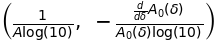

In [9]:
# perform partial differentiation
dML_dA = diff(ML_expr, A)
dML_ddelta = diff(ML_expr, delta)
dML_dA, dML_ddelta

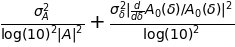

In [10]:
# solution of uncertainty in ML
sigma_2_ML = Abs(dML_dA)**2*sigma_2_A + Abs(dML_ddelta)**2*sigma_2_delta
sigma_2_ML

---
## Problem 8

After measuring the speed of sound $u$ several times, a student concludes that the standard
deviation $\sigma_u$ of her measurements is $\sigma_u = 10$ m/s. 
If all uncertainties were truly random,
she could get any desired precision by
making enough measurements and averaging.

- How many measurements are needed to give a nal uncertainty of 3 m/s?
- How many for a final uncertainty of only $\pm 0.5$ m/s?

---

**Solution**

The `sympy` module can also be used to evaluate expressions:


In [11]:
delta, sigma_u, n = symbols('delta, sigma_u, n')
delta, sigma_u, n

In [12]:
from sympy import sqrt, evalf, Eq, solve

In [13]:
# set delta equal to expression using `Eq` class
delta_eq = Eq(delta, sigma_u / sqrt(n))
delta_eq

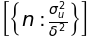

In [14]:
# rearrange for n and save in dict
n_dict = solve(delta_eq, n, dict=True)
n_dict

In [15]:
n_expr = n_dict[0].values()

In [16]:
# create a dictionary of values to evaluate expression with
subs = {delta: 3, sigma_u: 10}

# solve for n
solve(delta_eq.subs(subs), n, dict=True)

In [17]:
# create a dictionary of values to evaluate expression with
subs = {delta: 0.5, sigma_u: 10}

# solve for n
solve(delta_eq.subs(subs), n, dict=True)

---
## Problem 9
The uncertainty in  digital measurements can be taken to the last digit. 
Report the uncertainty of the measurements below:
- A digital voltmeter reads voltages to the nearest thousandth of a volt. 
What will be its percent uncertainty in measuring a voltage of approximately $3$ V?
- A digital balance reads masses to the nearest hundredth of a gram. 
What will be its percent uncertainty in measuring a mass of approximately $6$ g? 

---

**Solution**

- A measurement of $3.000 \pm 0.001$ V would be expressed as $3.000 \pm 0.03\%$ V.
- $6.00 \pm 0.01$ g would be written as $6.00 \pm 6\%$ g.


---
## Problem 10

| h (m) all +\- 0.05 | v^2 (m^2/s^2) |
|--------------------|---------------|
| 0.4                | 7  +/- 3        |
| 0.8                | 17 +/- 3        |
| 1.4                | 25 +/- 3        |
| 2.0                | 38 +/- 4        |
| 2.6                | 45 +/- 5        |
| 3.4                | 62 +/- 5        |
| 3.8                | 72 +/- 6        |

Use the table to plot the following:

- Make a plot of $v^2$ against $h$, including vertical and horizontal bars. 
- Is your plot consistent
with the prediction that $v^2 \propto h$
- The slope of your graph should be $2 g$. Use `lmfit` to calculate the slope. 
- Are your results consistent with the accepted value $2g = 19.6~m^2/s^2$?
---


**Solution**

First, we need to import modules:


In [18]:
!pip install lmfit

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, report_fit

     |████████████████████████████████| 307kB 7.3MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.2-cp37-none-any.whl size=85265 sha256=5bd8e5d4e48c129e2c5e3540fcf6d06447ea70fa72ce3ba92323538527fdbeb9
  Stored in directory: /root/.cache/pip/wheels/d4/5e/db/d9f5987d9f15bf910feb5e0274ac601d5f2161dc78aedfacfa
  Created wheel for asteval: filename=asteval-0.9.23-cp37-none-any.whl size=17419 sha256=dc5def5c876b27af51187c4c6b9244260841cdc41df33fa1025466b1033bb7e4
  Stored in directory: /root/.cache/pip/wheels/56/d6/43/4b5d8a9fd98b976031768673658c8b8d08dc9dcc0fa1907ad0
Successfully built lmfit asteval


See the [`lmfit` documentation](https://lmfit.github.io/lmfit-py/lmfit.pdf) 
for details on this awesome package. 

In [19]:
# create data arrays
h = np.array([0.4, 0.8, 1.4, 2.0, 2.6, 3.4, 3.8])
a = np.array([7, 17, 25, 38, 45, 62, 72])
yerr = [3, 3, 3, 4, 5, 5, 6]
h, a, yerr

(array([0.4, 0.8, 1.4, 2. , 2.6, 3.4, 3.8]),
 array([ 7, 17, 25, 38, 45, 62, 72]),
 [3, 3, 3, 4, 5, 5, 6])

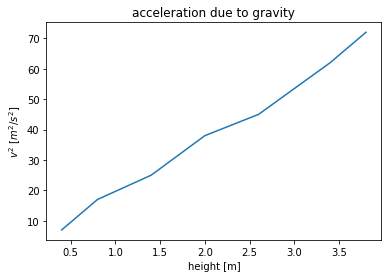

In [20]:
# quickly plot data to see shape and behavior
plt.plot(h, a)
plt.xlabel('height [m]')
plt.ylabel('$v^2~[m^2/s^2]$')
plt.title('acceleration due to gravity');

In [21]:
# define a fit function

def linear(x, m=1, b=0): # set initial (default) values if desired
  return x*m + b 

In [22]:
linear(h)

array([0.4, 0.8, 1.4, 2. , 2.6, 3.4, 3.8])

In [23]:
# pass your model to lmfit module
model = Model(linear)

# calculate fit 
result = model.fit(a, x = h)

In [24]:
# print all fit results
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 7
    # variables        = 2
    chi-square         = 19.8706697
    reduced chi-square = 3.97413395
    Akaike info crit   = 11.3033423
    Bayesian info crit = 11.1951626
[[Variables]]
    m:  18.3487291 +/- 0.63367429 (3.45%) (init = 1)
    b:  0.25404256 +/- 1.50565613 (592.68%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(m, b) = -0.866


In [25]:
# pretty print result params
result.params.pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
b     0.254     -inf      inf    1.506     True     None     None
m     18.35     -inf      inf   0.6337     True     None     None


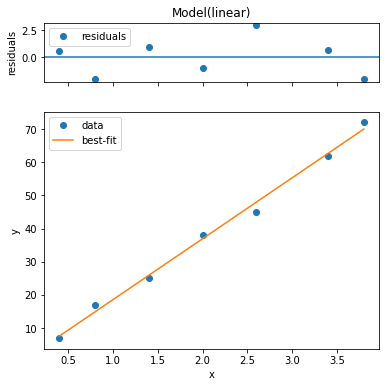

In [26]:
# lmfit provides a simple plot with residuals
result.plot();

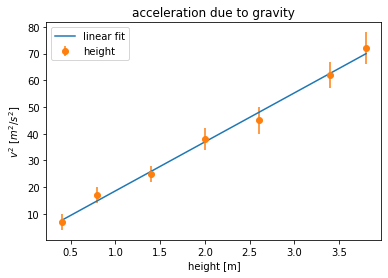

In [29]:
# plot in matplotlib - optional lmfit plot is good as long
# as labels are changed

plt.errorbar(h, a, yerr=yerr, fmt='o', label='height')
plt.plot(h, result.best_fit, label='linear fit')
plt.xlabel('height [m]')
plt.ylabel('$v^2~[m^2/s^2]$')
plt.title('acceleration due to gravity')
plt.legend();